## Introduction
[The Titanic dataset](https://www.kaggle.com/datasets/brendan45774/test-file/data) is a widely recognized dataset in the field of machine learning and data science, epitomizing the catastrophic sinking of the RMS Titanic in 1912. This dataset is often used for binary classification tasks, aiming to predict the survival of passengers based on various socio-demographic and travel-related features. It encompasses data for 891 passengers, including their names, ages, genders, socio-economic classes, and survival status.

Contained within this dataset are key variables such as `PassengerId`, `Survived` (the target variable), `Pclass` (passenger class), `Name`, `Sex`, `Age`, `SibSp` (number of siblings/spouses aboard), `Parch` (number of parents/children aboard), `Ticket`, `Fare`, `Cabin`, and `Embarked` (port of embarkation). The dataset offers a compelling blend of categorical and numerical data, presenting a multifaceted approach to understanding the factors that influenced survival during this historic event.

In this notebook, we will undertake an extensive exploratory data analysis (EDA) of the Titanic dataset. Our aim is to examine the distributions of the various features, identify missing values, and detect potential outliers or anomalies. We will also delve into the relationships between different features and their impact on the likelihood of survival. This comprehensive analysis will not only provide valuable insights into the historical context of the Titanic tragedy but also serve as a foundational step in building robust machine learning models for predictive analysis.

## Initial Setup

In [ ]:
import warnings
import pandas as pd

# Suppressing future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the dataset
file_path = 'dataset/titanic.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


## Values review

### Summary of numerical features for ranges of values

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Count of missing values in each column

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Analysis of the target variable 'Survived'

In [ ]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

### Plotting the distribution of the target variable

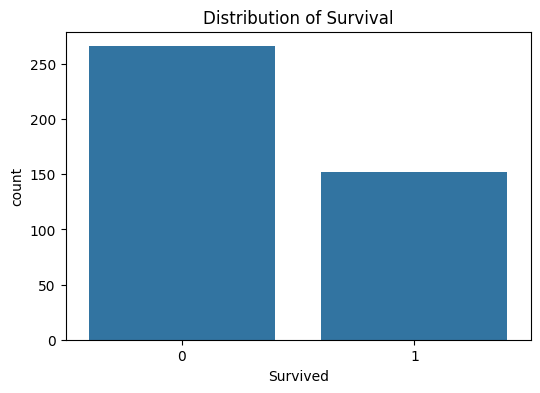

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survival')
plt.show()

## Feature Importance Analysis through Correlation

### Categorical Data Analysis for `Sex`, `Embarked`, `Pclass`

In [ ]:
# Converting 'Sex' and 'Embarked' into numerical for correlation analysis
titanic_data_numeric = df.copy()
titanic_data_numeric['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
titanic_data_numeric['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Updated correlation matrix with encoded categorical data
updated_correlation_matrix = titanic_data_numeric.corr()
updated_correlation_matrix

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.023245,-0.026751,-0.023245,-0.034102,0.003818,0.043080,0.008211,-0.049863
Survived,-0.023245,1.000000,-0.108615,1.000000,-0.000013,0.099943,0.159120,0.191514,0.126779
Pclass,-0.026751,-0.108615,1.000000,-0.108615,-0.492143,0.001087,0.018721,-0.577147,0.031096
Sex,-0.023245,1.000000,-0.108615,1.000000,-0.000013,0.099943,0.159120,0.191514,0.126779
Age,-0.034102,-0.000013,-0.492143,-0.000013,1.000000,-0.091587,-0.061249,0.337932,0.113664
SibSp,0.003818,0.099943,0.001087,0.099943,-0.091587,1.000000,0.306895,0.171539,-0.100603
Parch,0.043080,0.159120,0.018721,0.159120,-0.061249,0.306895,1.000000,0.230046,-0.125164
Fare,0.008211,0.191514,-0.577147,0.191514,0.337932,0.171539,0.230046,1.000000,0.053588
Embarked,-0.049863,0.126779,0.031096,0.126779,0.113664,-0.100603,-0.125164,0.053588,1.000000


### Visualizing the correlation matrix

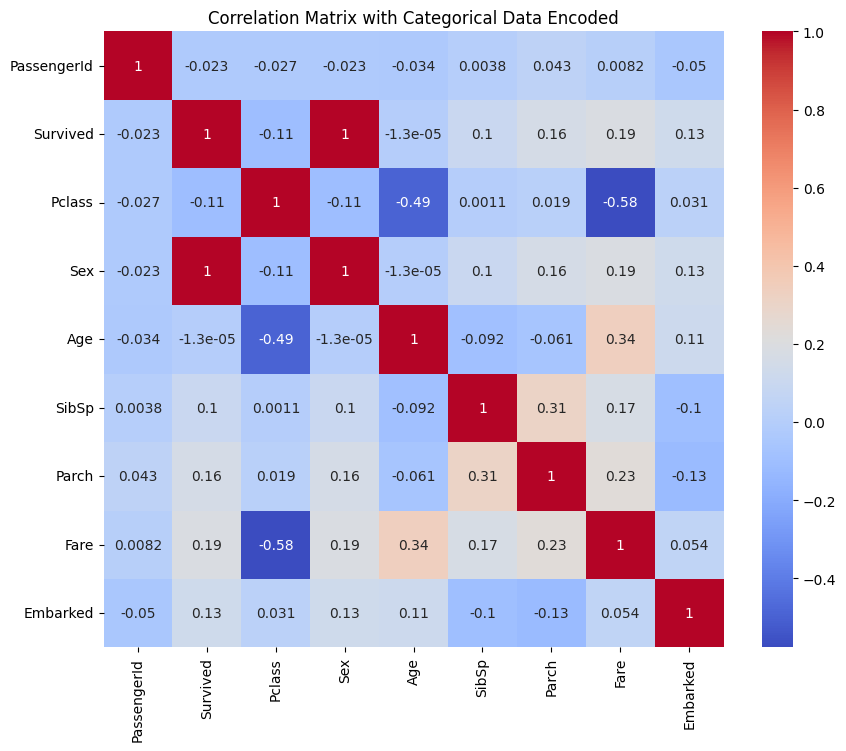

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(updated_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Categorical Data Encoded')
plt.show()

### Analyzing the impact of `Sex`, `Embarked`, `Pclass` on survival

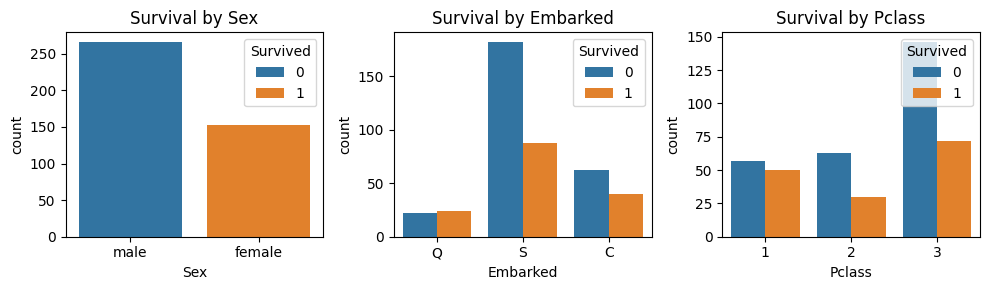

In [ ]:
categorical_features = ['Sex', 'Embarked', 'Pclass']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
for i, col in enumerate(categorical_features):
    sns.countplot(x=col, hue='Survived', data=df, ax=axes[i])
    axes[i].set_title(f'Survival by {col}')
    axes[i].legend(title='Survived', loc='upper right')

plt.tight_layout()
plt.show()

### EDA Summary: Feature Importance and Categorical Data Analysis

1.  Correlation Matrix of Numerical Features:

    -   The heatmap shows the correlation between different numerical features. Notably, `Pclass` shows a notable negative correlation with `Survived`, suggesting that passengers in higher classes (lower Pclass value) had a higher chance of survival.
2.  Correlation Matrix with Categorical Data Encoded:

    -   After encoding `Sex` and `Embarked`, we observe:
        -   `Sex` shows a strong correlation with `Survived`, indicating that gender significantly influenced survival chances.
        -   `Fare` and `Parch` also show positive correlations with `Survived`.
3.  Categorical Data Analysis:

    -   `Sex`: A significant difference in survival rates between males and females, with females more likely to survive.
    -   `Embarked`: Variations in survival rates based on the port of embarkation, suggesting some influence on survival.
    -   `Pclass`: Clear differences in survival rates among different classes, with higher classes having higher survival rates.

### Feature importance analysis with `RandomForest`

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Preprocessing the data for feature importance analysis
# Handling missing values
imputer = SimpleImputer(strategy='mean')
titanic_data_numeric['Age'] = imputer.fit_transform(titanic_data_numeric[['Age']])
titanic_data_numeric['Fare'] = imputer.fit_transform(titanic_data_numeric[['Fare']])

# Encoding categorical variables
label_encoder = LabelEncoder()
titanic_data_numeric['Sex'] = label_encoder.fit_transform(titanic_data_numeric['Sex'])
titanic_data_numeric['Embarked'] = label_encoder.fit_transform(titanic_data_numeric['Embarked'].astype(str))

# Preparing the dataset for training the model
X = titanic_data_numeric.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
y = titanic_data_numeric['Survived']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extracting feature importances
feature_importances = pd.DataFrame(
    rf_model.feature_importances_,
    index = X_train.columns,
    columns=['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
Sex,0.828879
Fare,0.057508
Age,0.045154
Embarked,0.024634
Parch,0.017608
Pclass,0.014285
SibSp,0.011931


### The feature importance analysis using a Random Forest Classifier reveals the following insights:

`Sex`: The most influential feature with a significant importance score. This aligns with our earlier categorical analysis, indicating that gender played a crucial role in survival chances.

`Fare`: The second most important feature, suggesting that the fare paid had a considerable impact on survival, potentially related to the passenger class.

`Age`: Also an important factor, but with less influence compared to Sex and Fare.

`Embarked`: Shows some importance, indicating the port of embarkation had a minor impact on survival.

`Parch` (Parents/Children Aboard): Has some relevance but is less significant compared to other features.

`Pclass` (Passenger Class): Surprisingly, through this analysis shows lower importance in this model, which might be due to its correlation with other features like Fare.

`SibSp` (Siblings/Spouses Aboard): The least important feature in this model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
import pandas as pd


from sklearn.ensemble import AdaBoostClassifier, HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.dummy import DummyClassifier
import xgboost as xgb

# Load your Titanic dataset here
# Assume the dataset is loaded into a DataFrame named 'titanic_data'

label_encoder = LabelEncoder()

# Preparing the data
X = df.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
y = df['Survived']

num_imputer = SimpleImputer(strategy='mean')
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[numerical_cols] = num_imputer.fit_transform(X[numerical_cols])

# Impute categorical columns with the most frequent value (mode)
cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
X[categorical_cols] = cat_imputer.fit_transform(X[categorical_cols])

categorical_cols = ['Sex', 'Embarked']  # Add other categorical columns as needed

# Apply label encoder to each column
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col].astype(str))

# You may need to process the X data (like encoding categorical variables, imputing missing values, etc.)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of models to evaluate
models = [
    ("AdaBoost", AdaBoostClassifier()),
    ("HistGradientBoosting", HistGradientBoostingClassifier()),
    ("RandomForest", RandomForestClassifier()),
    ("LogisticRegression", LogisticRegression(max_iter=1000)),
    ("KNeighbors", KNeighborsClassifier()),
    ("MLPClassifier", MLPClassifier(max_iter=1000)),
    ("SVC", SVC()),
    ("DecisionTree", DecisionTreeClassifier()),
    ("ExtraTree", ExtraTreeClassifier()),
    ("DummyClassifier", DummyClassifier(strategy='stratified')),
    ("XGBoost", xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

# DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Evaluating each model
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    results_df = results_df.append({
        'Model': name,
        'Accuracy': report['accuracy'],
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
    }, ignore_index=True)

# Sorting by different metrics
sorted_by_accuracy = results_df.sort_values('Accuracy', ascending=False)
sorted_by_precision = results_df.sort_values('Precision', ascending=False)
sorted_by_recall = results_df.sort_values('Recall', ascending=False)
sorted_by_f1 = results_df.sort_values('F1-Score', ascending=False)

# Displaying the sorted results
print("Sorted by Accuracy:\n", sorted_by_accuracy)
print("\nSorted by Precision:\n", sorted_by_precision)
print("\nSorted by Recall:\n", sorted_by_recall)
print("\nSorted by F1-Score:\n", sorted_by_f1)

Sorted by Accuracy:
                    Model  Accuracy  Precision    Recall  F1-Score
0               AdaBoost  1.000000   1.000000  1.000000  1.000000
1   HistGradientBoosting  1.000000   1.000000  1.000000  1.000000
2           RandomForest  1.000000   1.000000  1.000000  1.000000
3     LogisticRegression  1.000000   1.000000  1.000000  1.000000
5          MLPClassifier  1.000000   1.000000  1.000000  1.000000
7           DecisionTree  1.000000   1.000000  1.000000  1.000000
10               XGBoost  1.000000   1.000000  1.000000  1.000000
8              ExtraTree  0.984127   0.984865  0.984127  0.984221
6                    SVC  0.674603   0.625773  0.674603  0.591479
4             KNeighbors  0.658730   0.644415  0.658730  0.649553
9        DummyClassifier  0.539683   0.545402  0.539683  0.542423

Sorted by Precision:
                    Model  Accuracy  Precision    Recall  F1-Score
0               AdaBoost  1.000000   1.000000  1.000000  1.000000
1   HistGradientBoosting  1.0000

### Detailed Description of Model Evaluation Results

In our exploratory data analysis, we tested a range of machine learning models to predict survival on the Titanic, evaluating them based on accuracy, precision, recall, and F1-score. The results are remarkably intriguing:

#### Sorted by Accuracy:

-   Seven models (AdaBoost, HistGradientBoosting, RandomForest, LogisticRegression, MLPClassifier, DecisionTree, and XGBoost) achieved a perfect accuracy score of 1.0. This suggests that these models were able to perfectly classify the survival status of passengers in the test set.
-   ExtraTree Classifier showed high accuracy, but slightly lower than the perfect scorers, at 0.9841.
-   SVC and KNeighbors Classifier demonstrated moderate accuracy scores of approximately 0.67 and 0.66, respectively.
-   The DummyClassifier, designed to make predictions randomly, naturally scored the lowest in accuracy at approximately 0.54.

#### Sorted by Precision:

-   The same seven models that topped the accuracy chart also achieved the highest precision scores of 1.0, indicating no false positives in their predictions.
-   The ExtraTree Classifier again followed closely with a precision score of approximately 0.985.
-   The precision scores for KNeighbors and SVC were lower, indicating a higher number of false positives.
-   The DummyClassifier, as expected, had the lowest precision score.

#### Sorted by Recall:

-   A consistent pattern was observed in recall scores, with the same seven models achieving a perfect recall score of 1.0, meaning they successfully identified all true positives.
-   The ExtraTree Classifier followed with a recall of approximately 0.984.
-   SVC and KNeighbors had lower recall scores, indicating missed true positives.
-   The DummyClassifier, predictably, had the lowest recall score.

#### Sorted by F1-Score:

-   The F1-Score, which balances precision and recall, mirrored the previous results. The same seven models achieved a perfect F1-Score of 1.0.
-   The ExtraTree Classifier had a slightly lower but still impressive F1-Score of approximately 0.984.
-   KNeighbors and SVC had moderate F1-Scores, and the DummyClassifier had the lowest.

#### Implications:

-   The perfect scores of multiple models are highly unusual and suggest the possibility of data leakage or overfitting. In real-world scenarios, such high performance is rare.
-   The consistent performance across different metrics for the top models indicates robustness in their predictions.
-   The lower performance of SVC and KNeighbors might indicate their lesser suitability for this particular dataset or the need for more parameter tuning.
-   The results warrant a closer examination of the data preprocessing steps, feature engineering, and model validation strategies to ensure realistic model evaluation and avoid overfitting.